In [21]:
# Importing the libraries that we might need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')


%matplotlib inline 
# This is just to see the figures inside the jupyter notebook rather than in a pop-up window

matplotlib.rcParams['figure.figsize'] = (12,8) 
# To adjust a default figure size 

# Let's just get started !
movies = pd.read_csv("movies.csv") 
# This dataset from Kaggle is in the same folder as this jupyter notebook. Therefore, "movies.csv" 
                          # is enough. Otherwise, you should give the whole type in the whole path of the file.
    

In [22]:
movies.info()
# To have a first look at the information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [23]:
# It seems that we have a dataset of 7668 rows and 15 columns. 6 of the columns are in numeric data type.
# We have some missing data in some columns. I just want to delete them and then reset the index values 
movies.dropna(inplace=True)
movies.reset_index(inplace=True,drop=True)

In [24]:
#Re-checking the information about the dataset,

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 635.4+ KB


In [25]:
# Awsome ! Now, we have a dataset of 5421 rows and none of the rows include any null entries. Let's check the data
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [26]:
# Let's now find which genre has the highest average score
movies.groupby("genre").mean()["score"].sort_values(ascending=False).head(1)

genre
Biography    7.088103
Name: score, dtype: float64

<AxesSubplot:xlabel='genre', ylabel='score'>

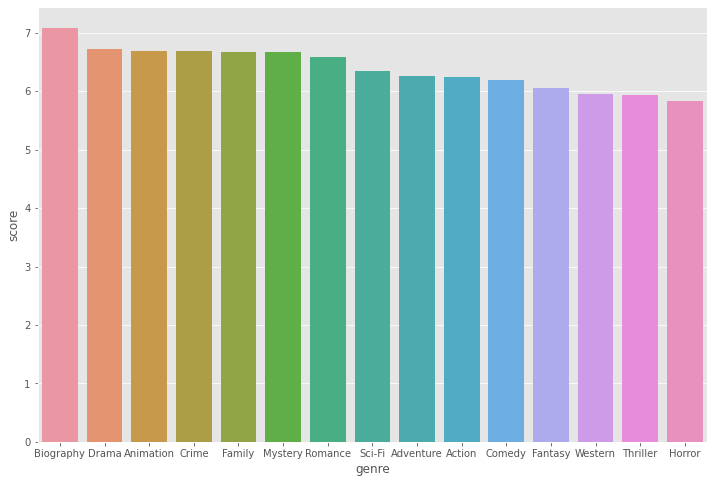

In [27]:
# I find it boring to watch a Biographical movie. Apparently most people don't.
# Let's have a barplot of top 10 genres based on their average score
x = movies.groupby("genre").mean()["score"].sort_values(ascending=False)
sns.barplot(x=x.index,y=x)

In [28]:
# Let's now find the average score change through time.
y = movies.groupby("year").mean()["score"]

Text(0, 0.5, 'Average rating')

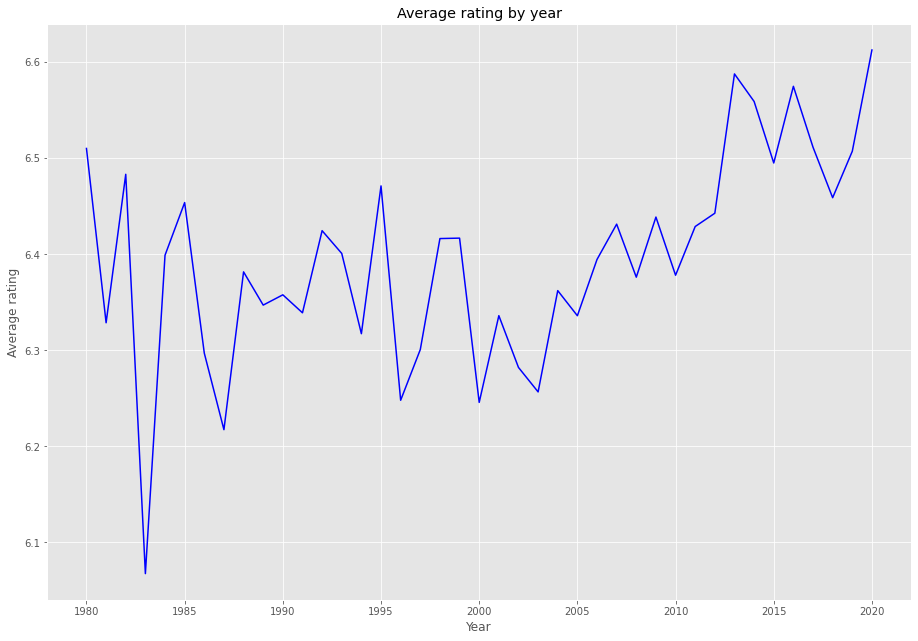

In [29]:
fig2 = plt.figure()
axes2 = fig2.add_axes([0,0,1,1])
axes2.plot(y,c='blue')
axes2.set_title ("Average rating by year")
axes2.set_xlabel ("Year")
axes2.set_ylabel ("Average rating")

In [30]:
 # The range is quite tight. However, it can be concluded that average ratings tended to decrease until 2005. It has been 
    # in an upward trend for almost two decades since 2005. Let's also check the budget and gross change over years.
    

In [31]:
average_budget = movies.groupby("year").mean()["budget"]
average_gross = movies.groupby("year").mean()["gross"]


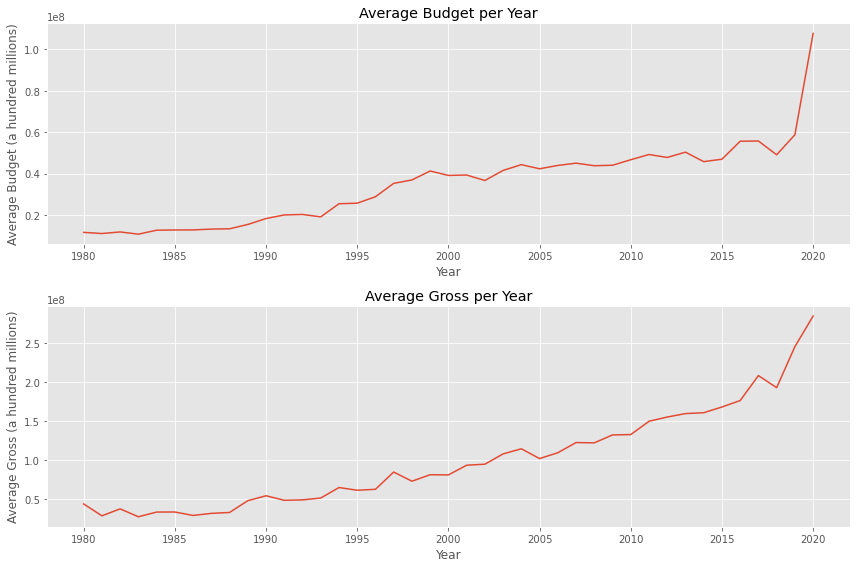

In [32]:
fig3,axes3 = plt.subplots(2,1)
axes3[0].plot(average_budget.index,average_budget)
axes3[0].set_title("Average Budget per Year")
axes3[0].set_xlabel("Year")
axes3[0].set_ylabel("Average Budget (a hundred millions)")
axes3[1].plot(average_gross.index,average_gross)
axes3[1].set_title("Average Gross per Year")
axes3[1].set_xlabel("Year")
axes3[1].set_ylabel("Average Gross (a hundred millions)")
plt.tight_layout()

<AxesSubplot:>

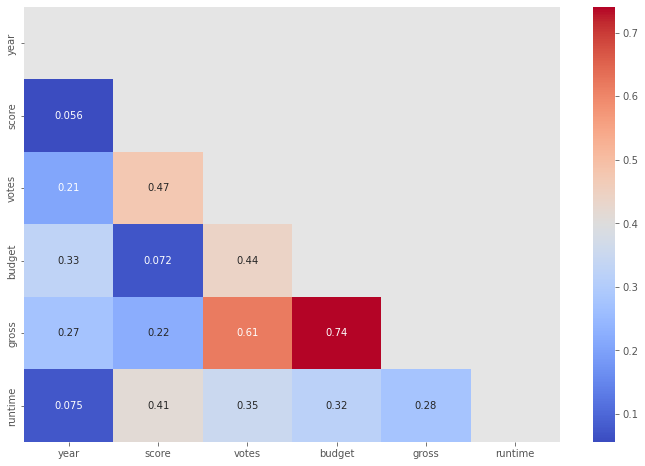

In [33]:
# As can be seen, graphs are pretty similar, let's also see the correlation between these two columnss
sns.heatmap(movies.corr(),annot=True,cmap='coolwarm',mask=np.triu(movies.corr()))

<AxesSubplot:xlabel='name', ylabel='GrossToBudget'>

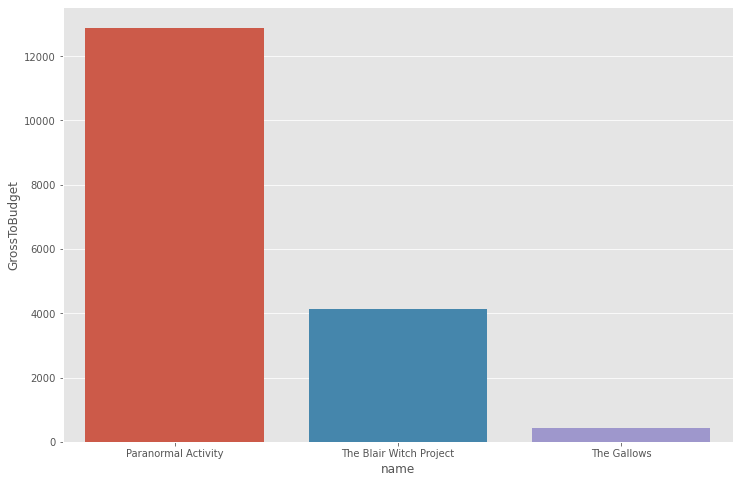

In [34]:
# Budget and gross have the highest corrolation among the data frame as indicated with red color and 0.67 on a 0-1 scale.
# Let's now see the gross/budget ratio and decide which movies were the biggest hits.

movies["GrossToBudget"] =  movies["gross"]/ movies["budget"]
df = movies[["name","GrossToBudget"]].sort_values("GrossToBudget",ascending=False).iloc[:3]

sns.barplot(x="name",y="GrossToBudget",data=df)

In [35]:
# Wow ! Paranormal activity by far has the highest Gross to Budget ratio. Let's check it out!
movies[movies.name == "Paranormal Activity"]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,GrossToBudget
3466,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000.0,193355800.0,Solana Films,86.0,12890.386667


<AxesSubplot:xlabel='votes'>

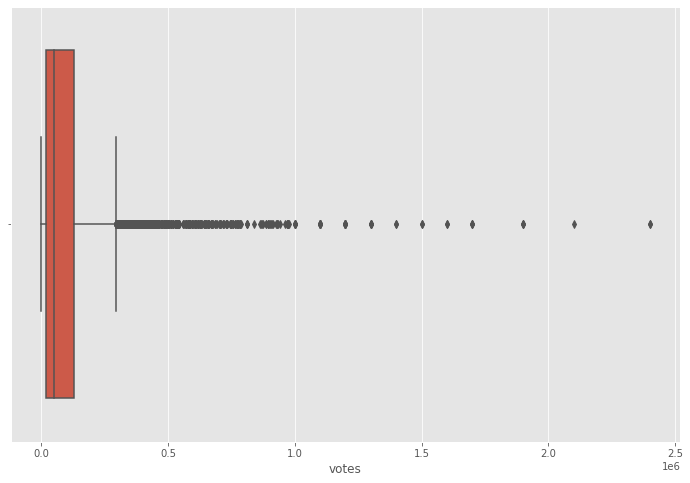

In [56]:
# 193 million dollars gross with only 15000 budget cost ! That's quite a success story.
# Let's now filter the data based on "votes" column.

sns.boxplot(x=movies["votes"])

In [60]:
# The vote numbers over 1 million seem to be extreme values. Let's filter the data.
MostVotedMovies = movies[movies.votes > 1000000]
MostVotedMovies.score.describe()

count    36.000000
mean      8.516667
std       0.335942
min       7.800000
25%       8.300000
50%       8.550000
75%       8.725000
max       9.300000
Name: score, dtype: float64

In [64]:
# 8.51 average scoring ! There is quite a correlation with the vote number and score. Let's finalise the data 
# analysis by congratulating the company who has the highest GrossToBudget ratio

MostVotedMovies.sort_values(["GrossToBudget"],ascending=[False])


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,GrossToBudget
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,5.383751e+08,Lucasfilm,124.0,28.909726
1384,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0,25.741095
2096,American Beauty,R,Drama,1999,"October 1, 1999 (United States)",8.3,1100000.0,Sam Mendes,Alan Ball,Kevin Spacey,United States,15000000.0,3.562966e+08,Dreamworks Pictures,122.0,22.753107
347,Back to the Future,PG,Adventure,1985,"July 3, 1985 (United States)",8.5,1100000.0,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States,19000000.0,3.819068e+08,Universal Pictures,116.0,19.100356
1246,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0,13.643693
1001,The Silence of the Lambs,R,Crime,1991,"February 14, 1991 (United States)",8.6,1300000.0,Jonathan Demme,Thomas Harris,Jodie Foster,United States,19000000.0,2.727429e+08,Strong Heart/Demme Production,118.0,13.354891
1385,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,6.782261e+08,Paramount Pictures,142.0,11.331384
2753,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0,11.191818
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,11.013697
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,10.008236


In [ ]:
# Star Wars Episode V -> 8.7 average rating by 1.2 million votes and its gross is almost 30 times its budget. 
# Well done,Star Wars !